In [9]:
import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



In [23]:
# se descarga datos del df
mnist = keras.datasets.mnist
(training_images, training_labels), (test_images,test_labels) = mnist.load_data()

In [11]:
# se identifica el numero de cada dato en pixeles.
index=9

In [12]:
#graficar el dato (9)= 4
np.set_printoptions(linewidth=320)
print(f'Label: {training_labels[index]}')
print(f'Image:/n {training_images[index]}')

Label: 4
Image:/n [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 189 190   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 143 247 153   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 136 247 242  86   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 192 252 187   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  62 185  18 

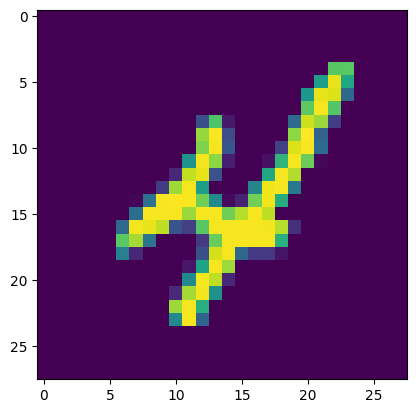

In [13]:
plt.imshow(training_images[index])

In [29]:
#normalizar datos 0 y 1
training_images = training_images / 255.0
test_images = test_images / 255.0


In [30]:
#construir modelo
modelo=keras.models.Sequential([

    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])



In [31]:
#compilar modelo
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'],)
modelo.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
#entrenar modelo
modelo.fit(training_images,training_labels, epochs=50 )

Epoch 1/50
1875/1875 [==============================] - 7s 3ms/step - loss: 0.8068 - accuracy: 0.7631
Epoch 2/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3926 - accuracy: 0.8877
Epoch 3/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3307 - accuracy: 0.9046
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2890 - accuracy: 0.9159
Epoch 5/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2567 - accuracy: 0.9250
Epoch 6/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2304 - accuracy: 0.9326
Epoch 7/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2088 - accuracy: 0.9380
Epoch 8/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1894 - accuracy: 0.9441
Epoch 9/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1731 - accuracy: 0.9491
Epoch 10/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.158

<Axes: >

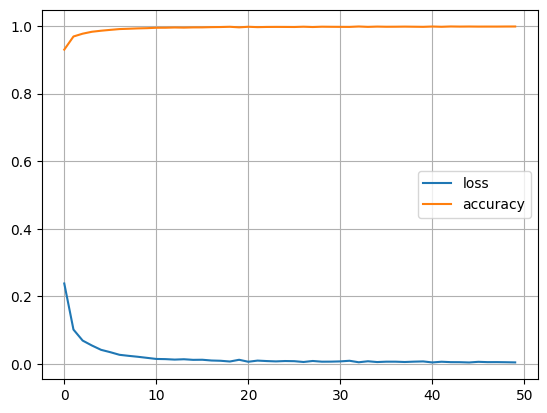

In [28]:
#graficas el modelo en el conjunto de entranamiento
pd.DataFrame(modelo.history.history).plot(grid=True)

In [19]:
#evaluar el modelo en el conjunto de entrenamineto
loss,accuracy=modelo.evaluate(training_images, training_labels)
print("perdida en el cojunto de entranamiento",loss)
print("precision en el conjunto de entranamiento",accuracy)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2207 - accuracy: 0.9393
perdida en el cojunto de entranamiento 0.2206791788339615
precision en el conjunto de entranamiento 0.9393166899681091


In [20]:
loss,accuracy=modelo.evaluate(test_images,test_labels)
print("perdida en el cojunto de test",loss)
print("precision en el conjunto de test",accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.2802 - accuracy: 0.9288
perdida en el cojunto de test 0.2801888585090637
precision en el conjunto de test 0.9287999868392944


In [21]:
# se verifica los primeros dies datos de prueba.
prediccion = modelo.predict(test_images[0:10])
print(prediccion)

1/1 [==============================] - 0s 194ms/step
[[6.2474984e-11 1.3447780e-16 1.9405912e-09 4.5307251e-03 3.7186155e-08 9.3418530e-06 3.0016816e-17 9.9526489e-01 4.8626562e-06 1.9017137e-04]
 [3.8530925e-06 7.6149456e-07 9.9405187e-01 3.4427647e-08 2.7012935e-19 1.1419114e-03 4.7995849e-03 2.6553266e-28 1.9954116e-06 2.2132175e-26]
 [5.1716388e-08 9.9096721e-01 6.2519875e-03 6.6565513e-04 4.1557647e-05 4.2707589e-04 2.9796839e-04 1.9588644e-07 1.2519564e-03 9.6362332e-05]
 [9.9988842e-01 7.2125498e-13 1.8070716e-05 7.6916524e-07 1.0385379e-08 5.9369099e-06 8.0023950e-05 1.8083601e-06 1.4507624e-06 3.5033281e-06]
 [1.1532607e-04 4.8597744e-09 4.2870885e-04 3.4194725e-06 9.7781837e-01 2.0889056e-05 7.0785277e-04 1.2015700e-03 4.1512295e-04 1.9288642e-02]
 [9.7282129e-09 9.9303859e-01 1.3862230e-03 5.6525943e-04 3.0778904e-06 1.5492709e-05 2.2414329e-06 3.9135432e-03 9.0937858e-04 1.6618959e-04]
 [1.1313783e-07 1.7623869e-09 8.4120046e-08 3.7194062e-05 9.8971200e-01 1.6454316e-03 1.5

In [22]:
##predicion que se presenta es de un modelo de tres capas = 160 nn , epocas = 15
#la predicion y perdida de datos de prueba= 11% , loss = 2.3 ; no reconose los datos
clase_predicha = np.argmax(prediccion, axis=1)
print(clase_predicha)

[7 2 1 0 4 1 4 9 6 9]


In [49]:
##predicion que se presenta es de un modelo de tres capas = 1000 nn , epocas = 15
#la predicion y perdida de datos de prueba= 11% , loss = 2.3 ; no reconose los datos
clase_predicha = np.argmax(prediccion, axis=1)
print(clase_predicha)

[1 1 1 1 1 1 1 1 1 1]


In [39]:
#predicion que se presenta es de un modelo de tres capas = 250 nn , epocas = 30
#la predicion y perdida de datos de prueba= 82% , loss = 56%
clase_predicha = np.argmax(prediccion, axis=1)
print(clase_predicha)

[7 2 1 0 4 1 9 9 4 9]



## **Preguntas de comprensión**
**¿Qué conjunto de datos se utiliza en este código y qué problema de aprendizaje automático se aborda?**

R/En este conjunto de datos se trabaja fotos de números trabajados a mano, el problema a solucionar es la clasificación de diez números, el modelo el cual debe aprender a identificar números presentados en los datos los cuales van de 0 a 9.

**¿Por qué es importante normalizar los valores de píxeles de las imágenes antes de entrenar el modelo?**

El modelo se puede segar porque los valores más pequeños se pueden perder en los valores más grandes, al normalizar los píxeles podemos garantizar el mejor funcionamiento de las funciones de activación, porque la mayoría de las funciones trabajan en el promedio de cero a uno.

**¿Qué arquitectura de red neuronal se utiliza en este código y cuántas capas tiene?**

Red Neuronal Artificial (RNA) completamente conectada , tiene tres capas una de entrada (flatten) , ocualta (128 NN) ,salida(10NN).



**¿Cuál es la función de activación utilizada en la capa oculta y en la capa de salida de la red neuronal, y por qué se eligen esas funciones?**

#el modelo original empiza con esta arquitectura.

En este proyecto se utilizó en la capa oculta relux= para que el modelo no sea lineal  en la red,Salida softmax=para Normaliza las salidas de la capa final a valores entre 0 y 1,

**¿Qué función de pérdida se utiliza para compilar el modelo y qué métricas se utilizan para evaluar su rendimiento?**

Función de pérdida: entropía cruzada categórica dispersa ,Métricas:
 Precisión.

** ¿Cuántas épocas se utilizan para entrenar el modelo y por qué se elige ese número?**
 el modelo comienza con  el número de época de 50 para empezar, luego eleve a 100 y termine en 200.
el propocito es identificar el mejor numero de epoca para el modelo.

**¿Qué signica la función model.summary() y qué información proporciona?**

comprender la arquitectura de un modelo de red neuronal y obtener información detallada sobre cada capa. Esta función genera un resumen textual que describe los componentes del modelo.

